# 使用pandas绘图

## 0.pandas介绍

pandas是一个很赞可以用于数据读取存写，数据处理和基本的数据统计和可视化的python包。下面的例子从几个方面来介绍pandas的基本使用

---
- 使用pandas读取数据
- 使用pandas处理数据
- 使用pandas进行基本可视化与分析

# 1.使用pandas读取数据

一般我们会有一些csv文件，或者excel文件，希望能顾快速的读取并处理，pandas提供了对很多常见数据格式的读写<a  href=http://pandas.pydata.org/pandas-docs/stable/visualization.html/> 更多详细内容可以参考这里</a>。下面代码演示如何读取csv数据。

In [9]:
import pandas as pd
df1 = pd.read_csv('data/dataforexcies.csv')

可以看出来，实际读取csv只要一行代码，确实很方便。那么df1是什么呢？我们来看一下

In [10]:
type(df1)

pandas.core.frame.DataFrame

看起来是pandas里定义的一个数据类型，叫`pandas.core.frame.DataFrame`,我们叫它DataFrame类型。这就是pandas中最经常看到的数据类型（`DataFrame`）。那到底什么是DataFrame？以及如何操作和使用它呢？<a href=http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe>详细参考这里</a>，这里我们简单的介绍下：DataFrame看起来就是和我们的Excel表一样的结构，如果用过Excel，那么理解DataFrame也一样。比如我们在ipython里输入df1，ipython 会显示它的值。

In [11]:
df1

,id,a,b,c,d
0,0,0.519560,0.098001,0.717732,0.215498
1,1,0.612361,0.549056,0.144109,0.750506
2,2,0.052797,0.580886,0.552579,0.479337
3,3,0.441298,0.353870,0.146157,0.788032
4,4,0.864006,0.175923,0.428471,0.146967
5,5,0.123659,0.059749,0.287601,0.939146
6,6,0.488267,0.748173,0.507685,0.916040
7,7,0.438814,0.608167,0.342375,0.404993
8,8,0.888500,0.032364,0.160007,0.830403
9,9,0.794677,0.860551,0.607981,0.044525


可以看出来它被显示成了一个表

#### 读取数据库中的值并把它变成 DataFrame

In [12]:
# import sys  
import pandas as pd
from pandas.io.json import json_normalize
import pymongo

## 解决中文编码问题
# reload(sys)  
# sys.setdefaultencoding('utf8')

## 设置连接数据库
def connectMongoDB(database,collection):
    conn_mongo = pymongo.MongoClient("localhost", 27017)
    db_mongo = conn_mongo[database]
    coll_mongo = db_mongo[collection]
    return coll_mongo
database='DaShangDi'
collection = 'comment'
DaShangDi_shop_comment = connectMongoDB(database,collection)

## 得到DataFrame
shop_comment = json_normalize([item for item in DaShangDi_shop_comment.find()])

可以看到其实也只有一行代码，得到的shop_comment就是一个数据库中数据的表格（DataFrame）版本

# 2.处理数据

处理数据是pandas的主要功能，他像操纵excel一样来操纵DataFrame

- 去掉某些列

df1数据中id这一列前面似乎也有个id序号，要是我们把它删除，要怎么办呢

In [17]:
df1 = df1[['a','b','c','d']]
df1

,a,b,c,d
0,0.519560,0.098001,0.717732,0.215498
1,0.612361,0.549056,0.144109,0.750506
2,0.052797,0.580886,0.552579,0.479337
3,0.441298,0.353870,0.146157,0.788032
4,0.864006,0.175923,0.428471,0.146967
5,0.123659,0.059749,0.287601,0.939146
6,0.488267,0.748173,0.507685,0.916040
7,0.438814,0.608167,0.342375,0.404993
8,0.888500,0.032364,0.160007,0.830403
9,0.794677,0.860551,0.607981,0.044525


- 选取某些行

In [21]:
## 这样会选取前五行
df1 = df1[:5]
df1

,a,b,c,d
0,0.519560,0.098001,0.717732,0.215498
1,0.612361,0.549056,0.144109,0.750506
2,0.052797,0.580886,0.552579,0.479337
3,0.441298,0.353870,0.146157,0.788032
4,0.864006,0.175923,0.428471,0.146967


- 添加列

In [25]:
# 为df1添加列Lu，它的值是d列的对应值的10倍
df1['Lu']=df1['d']*10
df1

,a,b,c,d,Lu
0,0.519560,0.098001,0.717732,0.215498,2.154977
1,0.612361,0.549056,0.144109,0.750506,7.505056
2,0.052797,0.580886,0.552579,0.479337,4.793366
3,0.441298,0.353870,0.146157,0.788032,7.880316
4,0.864006,0.175923,0.428471,0.146967,1.469668


- 更多

当然不止这些处理，其实有非常多有用的处理，非常<a href=https://github.com/wybert/pandas-cookbook> 推荐这个教程 </a>

# 3.使用pandas进行基本可视化与分析

还是使用df1这个DataFrame作为例子

- 基本描述统计

In [29]:
## 基本描述统计
df1.describe()

,a,b,c,d,Lu
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.498005,0.351547,0.397809,0.476068,4.760676
std,0.295349,0.216068,0.252457,0.295319,2.953187
min,0.052797,0.098001,0.144109,0.146967,1.469668
25%,0.441298,0.175923,0.146157,0.215498,2.154977
50%,0.519560,0.353870,0.428471,0.479337,4.793366
75%,0.612361,0.549056,0.552579,0.750506,7.505056
max,0.864006,0.580886,0.717732,0.788032,7.880316


describe()返回了每一列值的计数，均值，标注差（std是标准差对吧），最小值，几个分位数，最大值

In [30]:
## 数据类型查看
df1.dtypes

a     float64
b     float64
c     float64
d     float64
Lu    float64
dtype: object

- 基本描述统计

pandas封装了matplotlib所以更加方便使用一些，详细的<a href=http://pandas.pydata.org/pandas-docs/stable/visualization.html>参考这里</a>，这里简要的说明柱状图和折线图的绘制

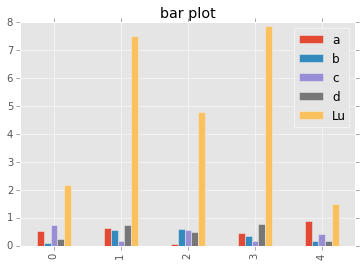

In [36]:
## 柱状图
%matplotlib inline
# import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

## 绘图
df1.plot(kind='bar',title='bar plot');

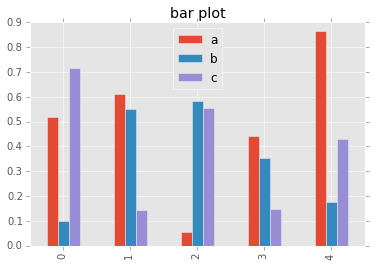

In [38]:
df1[['a','b','c']].plot(kind='bar',title='bar plot');

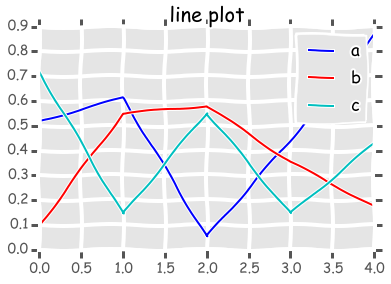

In [42]:
## 绘制折现图
df1[['a','b','c']].plot(kind='line',title='line plot');

---

下面的这些博客写的很好，可以阅读下
- <a href=http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/> pandas-and-python-top-10 </a>